# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

In this project, by implementing Deep Deterministic Policy Gradient (DDPG) algorithm (https://arxiv.org/pdf/1706.02275.pdf), we train a model which controls two agents, and these agents need to keep the ball in play.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

The environment is already saved in the Workspace and can be accessed at the file path provided below. 

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
from unityagents import UnityEnvironment
import numpy as np

env = UnityEnvironment(file_name="...")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.65278625 -1.5        -0.          0.
  6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [36]:
for i in range(5):                                         # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291


When finished, you can close the environment.

In [ ]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

In [5]:
from collections import deque
import numpy as np
import torch
import matplotlib.pyplot as plt
from maddpg import Agent

### HyperParameters

- Buffer size : $10^6$ 
- Batch size : 256
- Discount factor : 0.99
- Tau for soft update : 0.01
- Learning rate of actor network : 0.001
- Learning rate of critic network : 0.001

### Network Explanation

- Actor Network : Fully connected layers

    The first hidden layer has 400 nodes and the second hidden layer has 300 nodes.
    
    At those hidden layers, leaky relu function is applied as an activation function.
    
    Tanh is applied at the last layer to generate an output whose value is [-1,1].
    
    
- Critic Network : Fully connected layers

    The first hidden layer has 256 nodes and the second hidden layer has 128 nodes.
    
    At those hidden layers, leaky relu function is applied as an activation function.



In [6]:
BUFFER_SIZE=int(1e6)
BATCH_SIZE=265
GAMMA=0.99     
TAU=1e-2
LR_ACTOR=1e-3     
LR_CRITIC=1e-3      
WEIGHT_DECAY=0
RANDOM_SEED=0

In [7]:
agent1 = Agent(
    state_size=state_size,
    action_size=action_size,
    buffer_size=BUFFER_SIZE,
    batch_size=BATCH_SIZE,    
    gamma=GAMMA,           
    tau=TAU,
    lr_actor=LR_ACTOR,       
    lr_critic=LR_CRITIC,        
    weight_decay=WEIGHT_DECAY)
agent2 = Agent(
    state_size=state_size,
    action_size=action_size,
    memory=agent1.memory, # This agent shares the replay memory with the agent 1. 
    batch_size=BATCH_SIZE,    
    gamma=GAMMA,           
    tau=TAU,
    lr_actor=LR_ACTOR,       
    lr_critic=LR_CRITIC,        
    weight_decay=WEIGHT_DECAY)

Episode 100	Average Score: 0.01 best_score 0.10000000149011612
Episode 200	Average Score: 0.02 best_score 0.30000000447034836
Episode 300	Average Score: 0.10 best_score 0.40000000596046456
Episode 367	Average Score: 0.62 best_score 2.7000000402331352
Environment solved in 367 episodes!	Average Score: 0.62


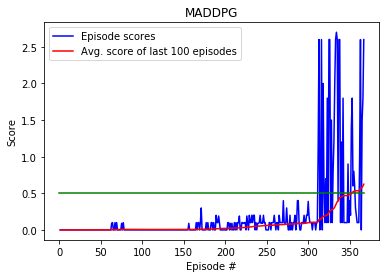

In [8]:
STOP_NOISE_AFTER_EP=300
env_info = env.reset(train_mode=True)[brain_name]
def ddpg(n_episodes=1500, print_every=100):
    scores_deque = deque(maxlen=print_every)
    scores = []
    avg_scores = []
    best_score = 0.0
    add_noise = True
    for i_episode in range(1, n_episodes+1):
        if i_episode > STOP_NOISE_AFTER_EP:
            add_noise = False
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        agent1.reset()
        agent2.reset()
        scores_ep = np.zeros(num_agents)
        while True:
            action1 = agent1.act(states[0], add_noise=add_noise).tolist()
            action2 = agent2.act(states[1], add_noise=add_noise).tolist()
            actions = np.array([action1, action2])
            env_info = env.step(actions)[brain_name]
            next_states = env_info.vector_observations
            rewards = env_info.rewards
            dones = env_info.local_done
            agent1.step(states[0], action1, rewards[0], next_states[0], dones[0])
            agent2.step(states[1], action2, rewards[1], next_states[1], dones[1])
            scores_ep += rewards
            states = next_states
            if np.any(dones):
                break
        max_score = np.max(scores_ep)
        scores_deque.append(max_score)
        scores.append(max_score)
        avg_scores.append(np.mean(scores_deque))
        
        if max_score > best_score:
            best_score = max_score
        print('\rEpisode {}\tAverage Score: {:.2f} best_score {}'.format(i_episode, np.mean(scores_deque), best_score), end="")
        torch.save(agent1.actor_local.state_dict(), 'checkpoint_actor1.pth')
        torch.save(agent1.critic_local.state_dict(), 'checkpoint_critic1.pth')
        torch.save(agent2.actor_local.state_dict(), 'checkpoint_actor2.pth')
        torch.save(agent2.critic_local.state_dict(), 'checkpoint_critic2.pth')
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
        if np.mean(scores_deque) >= 0.6:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            torch.save(agent1.actor_local.state_dict(), 'checkpoint_actor1.pth')
            torch.save(agent1.critic_local.state_dict(), 'checkpoint_critic1.pth')
            torch.save(agent2.actor_local.state_dict(), 'checkpoint_actor2.pth')
            torch.save(agent2.critic_local.state_dict(), 'checkpoint_critic2.pth')
            break
    return scores, avg_scores

scores, avg_scores = ddpg()

fig = plt.figure()
plt.plot(np.arange(1, len(scores)+1), scores, 'b', label='Episode scores')
plt.plot([0,367],[0.5,0.5],'g')
plt.plot(np.arange(1, len(scores)+1), avg_scores, 'r', label='Avg. score of last 100 episodes')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title('MADDPG')
plt.legend()
plt.show()

In [ ]:
env.close()

# Future Improvement

- Implementing Prioritized Experience Replay (PER)
    PER enables to sample more important samples from the replay memory. This may enhance the learning speed.